# Data Correlation and Categorical Variable Encoding<br>
### Objectives:
<br>-Data Correlation
<br>-Heatmap
<br>-Dealing with categorical variables
<br>-Label encoding
<br>-One-hot encoding
<br>-Categorical variable creation from the numeric variable

<br>Ref: One-Hot Encoding vs. Label Encoding using Scikit-Learn: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

sns.set_context("talk")

In [30]:
df= pd.read_csv("audi.csv")
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


### Initial assumptions between the variables:
<br> * Car price increases when mpg/engineSize increases
<br> * Car price decreases when the mileage increases
<br> * Mpg decreases when engineSize increases
<br> * Car price increases with the latest year cars

### Correlations between variables:

In [31]:
df_cor = df.corr()
display(df_cor)

,year,price,mileage,mpg,engineSize
year,1.000000,0.592581,-0.789667,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,0.395103,0.070710
mpg,-0.351281,-0.600334,0.395103,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,-0.365621,1.000000


### Heatmap of the correlations:

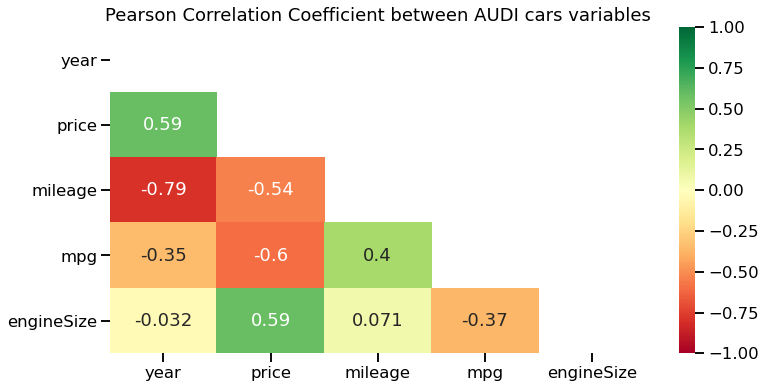

In [32]:
plt.figure(figsize=(12, 6))

# create a mask of lower triangular matrix
mask = np.zeros_like(df_cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_cor, 
            annot=True, 
            cmap="RdYlGn", 
            vmax=1, vmin=-1,
            mask = mask)

plt.title("Pearson Correlation Coefficient between AUDI cars variables")
plt.show()

#### Observations:
<br> * Car price increases when mpg : <b>FALSE</b> [Strong Negative Correlation]
<br> * Car price increases when engineSize increases: <b>TRUE</b> [Moderate Positive Correlation]
<br> * Car price decreases when the mileage increases: <b>TRUE</b> [Moderate Negative Correlation]
<br> * Mpg decreases when engineSize increases: <b>TRUE</b> [Weak Negative Correlation]
<br> * Car price increases with the latest year cars: <b>TRUE</b> [Moderate Positive Correlation] 

### Dealing With Categorical Variable

In [33]:
print(df['transmission'].unique())
print(len(df['transmission'].unique()))
display(df['transmission'].value_counts())

['Manual' 'Automatic' 'Semi-Auto']
3


Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [34]:
print(df['fuelType'].unique())
print(len(df['fuelType'].unique()))
display(df['fuelType'].value_counts())

['Petrol' 'Diesel' 'Hybrid']
3


Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [35]:
print(df['model'].unique())
print(len(df['model'].unique()))
display(df['model'].value_counts())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
26


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

### Label ENCODING

In [36]:
LE = LabelEncoder()

df['transmission'] = LE.fit_transform(df['transmission'])
df['fuelType'] = LE.fit_transform(df['fuelType'])
df['model'] = LE.fit_transform(df['model'])

display(df.sample(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
7895,5,2016,18990,0,41000,0,61.4,2.0
4165,10,2017,39990,2,24550,2,34.0,3.0
1295,9,2015,15698,1,24861,0,60.1,2.0
7041,2,2015,14383,1,33814,0,68.9,2.0
9463,25,2019,34490,0,7881,2,38.7,2.0
698,9,2016,16995,2,52496,0,50.4,2.0
7986,3,2012,9500,1,62000,0,65.7,2.0
754,2,2014,7898,2,88130,0,64.2,2.0
10112,3,2008,3990,1,148000,0,35.8,3.0
1842,2,2017,13695,1,26413,2,60.1,1.0


### One-Hot ENCODING

In [37]:
df = pd.read_csv("audi.csv")

df_transmission = pd.get_dummies(df[['transmission']])

display(df_transmission.sample(6))

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
4526,0,1,0
2007,0,0,1
8892,1,0,0
7430,0,0,1
3621,0,1,0
2128,0,1,0


In [38]:
df = pd.read_csv("audi.csv")

df_transmission = pd.get_dummies(df[['transmission']], drop_first=True)

display(df_transmission.sample(6))

,transmission_Manual,transmission_Semi-Auto
4254,0,1
2644,0,1
9081,1,0
7069,0,1
2307,1,0
4507,0,0


In [40]:
print(df.shape)
df = pd.get_dummies(df, drop_first=True)

display(df.sample(5))
print(df.shape)

(10668, 34)


,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
7246,2019,24400,6961,50.4,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6943,2016,14599,46900,50.4,2.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
365,2019,20495,4781,40.9,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1687,2016,24490,39507,50.4,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5911,2017,13295,32525,70.6,2.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


(10668, 34)


### Numerical Variable to Categorical Variable

In [41]:
df['mileage'].describe()

count     10668.000000
mean      24827.244001
std       23505.257205
min           1.000000
25%        5968.750000
50%       19000.000000
75%       36464.500000
max      323000.000000
Name: mileage, dtype: float64